---
### Importing Required Packages for the Project
---

In [1]:
# Importing Required Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

---
### Connecting Google Colab with Google Drive
---

In [2]:
# Connecting google colab with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
### Data Reading and Basic Data Exploration Tasks

* Data Reading
* Shape Finding
* Column Names extracting
* Column Types observing
* Checking for missing values
---

In [3]:
# Read the 'FourDisaster_SouthAsianData2000to2020.csv' file
# Store the result in an object called fourdisaster_df

fourdisaster_df = pd.read_csv('/content/drive/MyDrive/Project_Data_Sets/FourDisaster_SouthAsianData2000to2020.csv')
fourdisaster_df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
1,2000-0146-BGD,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":5812,""adm2_name"":""Natore""}]",2005-04-24,2023-09-25
2,2000-0211-BGD,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":5790,""adm2_name"":""Netrakona""},{""...",2005-04-24,2023-09-25
3,2000-0229-BGD,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":5790,""adm2_name"":""Netrakona""},{""...",2003-07-01,2023-09-25
4,2000-0283-BGD,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":5769,""adm2_name"":""Chandpur""},{""a...",2004-10-25,2023-09-25


In [4]:
# Get the shape of the fourdisaster_df data frame

print('Number of Rows are:', fourdisaster_df.shape[0])
print('Number of Columns are:', fourdisaster_df.shape[1])

Number of Rows are: 781
Number of Columns are: 46


In [5]:
# Get the Column names

fourdisaster_df.columns.values

array(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion',
       'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)",
       'CPI', 'Admin Units', 'Entry Date', 'Last Update'], dtype=object)

In [6]:
# Get the column types of the data frame object

fourdisaster_df.dtypes

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   

In [7]:
# Check for any missing values in the data frame

fourdisaster_df.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 562
Event Name                                   736
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                       5
Origin                                       377
Associated Types                             527
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  710
Magnitude           

---
### Data Manipulation Tasks

* Create a function that will fecth the year values from the 'DisNo.' column
* Apply the function on the data frame to create another column 'Year'
---

In [8]:
# Extracting the Year value from the column 'DisNo.'
# To do this, first I am defining a function that will extract the first part of the entries
# The parts are splitted by '-', so it is possible

def get_year(entry):        # The name of the function is 'get_year'
  return entry.split('-')[0]  # It takes the entries of the 'DisNo.' column

# Craeting a new column called 'Year' and storing the splitted values

fourdisaster_df['Year'] = fourdisaster_df['DisNo.'].apply(get_year)
fourdisaster_df.columns.values # The column 'Year' creation is successful

array(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion',
       'Region', 'Location', 'Origin', 'Associated Types',
       'OFDA/BHA Response', 'Appeal', 'Declaration',
       "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
       "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)",
       'CPI', 'Admin Units', 'Entry Date', 'Last Update', 'Year'],
      dtype=object)

---
### Data Retrieving & Data Analysis Using SQL queries

* Connect the data frame to sqlite3 data base, store it in main memeory
* Save the table name as 'SDEF'(Storm, Drought, Earthquake, Flood)
---

In [9]:
# Connecting the data frame with sqlite3 data base

conn = sqlite3.connect(':memory:')
fourdisaster_df.to_sql('SDEF', conn, index = False)

781

In [10]:
# Select South Asian Countries that are affected by Flood Disasters

query1 = 'SELECT DISTINCT(Country), "Disaster Type", "Disaster Subtype", "ISO" \
FROM SDEF WHERE "Disaster Type" = "Flood" ;'

result1_df = pd.read_sql_query(query1, conn)
result1_df

,Country,Disaster Type,Disaster Subtype,ISO
0,India,Flood,Flash flood,IND
1,Bangladesh,Flood,Flash flood,BGD
2,India,Flood,Riverine flood,IND
3,Nepal,Flood,Flood (General),NPL
4,Bhutan,Flood,Riverine flood,BTN
5,Iran (Islamic Republic of),Flood,Flash flood,IRN
6,Bangladesh,Flood,Coastal flood,BGD
7,Sri Lanka,Flood,Riverine flood,LKA
8,Iran (Islamic Republic of),Flood,Flood (General),IRN
9,India,Flood,Flood (General),IND


In [15]:
# Select South Asian Countries that are affected by Storm Disasters

query2 = 'SELECT DISTINCT(Country), "Disaster Type", "Disaster Subtype", "ISO" \
FROM SDEF WHERE "Disaster Type" = "Storm" ;'

result2_df = pd.read_sql_query(query2, conn)
result2_df

,Country,Disaster Type,Disaster Subtype,ISO
0,Iran (Islamic Republic of),Storm,Storm (General),IRN
1,Bangladesh,Storm,Tornado,BGD
2,Bangladesh,Storm,Tropical cyclone,BGD
3,Bangladesh,Storm,Storm (General),BGD
4,India,Storm,Tropical cyclone,IND
5,Sri Lanka,Storm,Tropical cyclone,LKA
6,Pakistan,Storm,Tornado,PAK
7,India,Storm,Lightning/Thunderstorms,IND
8,India,Storm,Hail,IND
9,Pakistan,Storm,Severe weather,PAK


In [19]:
# Select South Asian Countries that are affected by Earthquake Disasters

query3 = 'SELECT DISTINCT(Country), "Disaster Type", "Disaster Subtype", "ISO" \
FROM SDEF WHERE "Disaster Type" = "Earthquake" ;'

result3_df = pd.read_sql_query(query3, conn)
result3_df

,Country,Disaster Type,Disaster Subtype,ISO
0,Bangladesh,Earthquake,Ground movement,BGD
1,Iran (Islamic Republic of),Earthquake,Ground movement,IRN
2,India,Earthquake,Ground movement,IND
3,Pakistan,Earthquake,Ground movement,PAK
4,Afghanistan,Earthquake,Ground movement,AFG
5,Bangladesh,Earthquake,Tsunami,BGD
6,India,Earthquake,Tsunami,IND
7,Sri Lanka,Earthquake,Tsunami,LKA
8,Maldives,Earthquake,Tsunami,MDV
9,Bhutan,Earthquake,Ground movement,BTN


In [22]:
# Select South Asian Countries that are affected by Drought Disasters

query4 = 'SELECT DISTINCT(Country), "Disaster Type", "Disaster Subtype", "ISO" \
FROM SDEF WHERE "Disaster Type" = "Drought" ;'

result4_df = pd.read_sql_query(query4, conn)
result4_df

,Country,Disaster Type,Disaster Subtype,ISO
0,Afghanistan,Drought,Drought,AFG
1,India,Drought,Drought,IND
2,Sri Lanka,Drought,Drought,LKA
3,Nepal,Drought,Drought,NPL
4,Bangladesh,Drought,Drought,BGD
5,Pakistan,Drought,Drought,PAK


---
### Data Visualization Using Python - Matplotlib, seaborn

* Frequency of Disaster Subtypes for Flood
* Frequency of Disaster Subtypes for Storm
* Frequency of Disaster subtypes for Earthquake
* Number of Flood Incidences in Different Countries
* Number of Earthquake Incidences in Different Countries
* Number of Storm Incidences in Different Countries
* Number of Drought Incidences in Different Countries
---

Text(0.5, 0, 'Frequency/Count of Incidents')

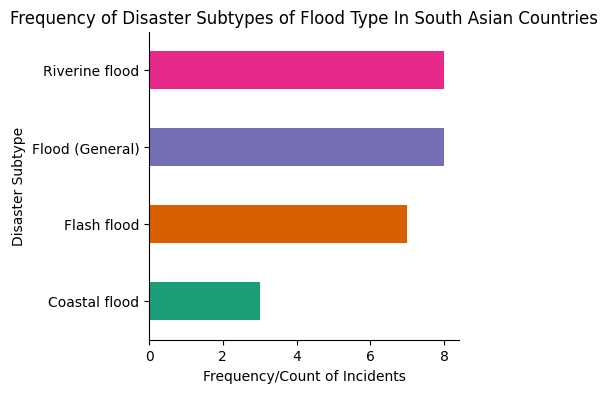

In [27]:
# Distribution of Disaster Subtypes of the Flood type in South Asian Countries

plt.figure(figsize = (4,4))
result1_df.groupby('Disaster Subtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Frequency of Disaster Subtypes of Flood Type In South Asian Countries')
plt.xlabel('Frequency/Count of Incidents')

Text(0.5, 1.0, 'Frequency of Disaster Subtypes of Storm Type In South Asian Countries')

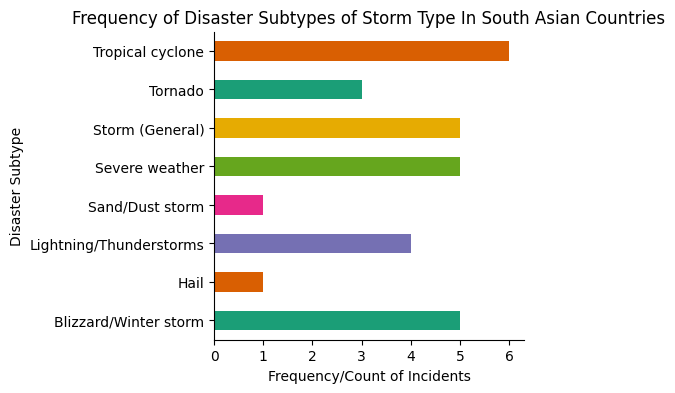

In [26]:
# Distribution of Disaster Subtypes of the Storm type in South Asian Countries

plt.figure(figsize = (4,4))
result2_df.groupby('Disaster Subtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frequency/Count of Incidents')
plt.title('Frequency of Disaster Subtypes of Storm Type In South Asian Countries')

Text(0.5, 1.0, 'Frequency of Disaster Subtypes of Earthquake Type In South Asian Countries')

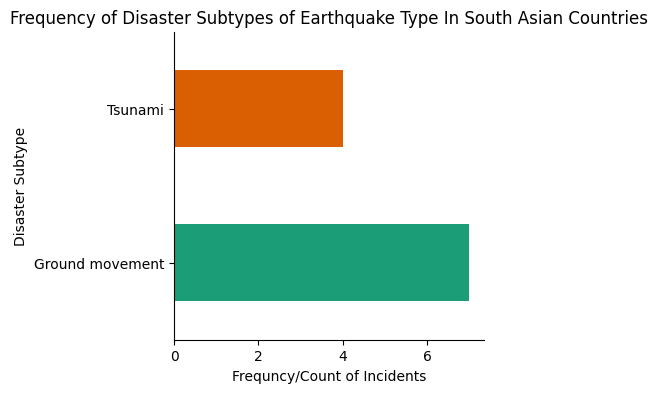

In [25]:
# Distribution of Disaster Subtypes of the Earthquake type in South Asian Countries

plt.figure(figsize = (4,4))
result3_df.groupby('Disaster Subtype').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frequncy/Count of Incidents')
plt.title('Frequency of Disaster Subtypes of Earthquake Type In South Asian Countries')

Text(0.5, 0, 'Frequency/Count of Incidents')

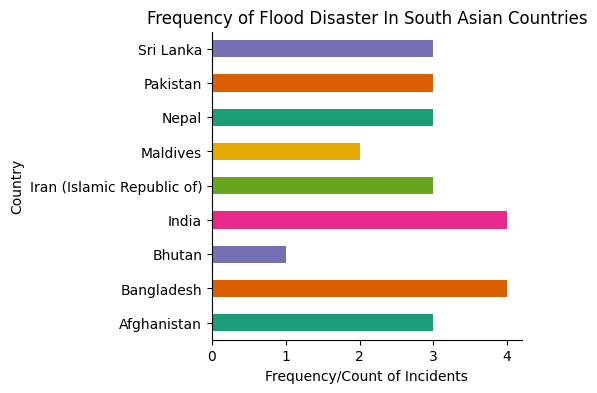

In [24]:
# Frequency of Flood Disasters in South Asian Countries

plt.figure(figsize = (4,4))
result1_df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Frequency of Flood Disaster In South Asian Countries')
plt.xlabel('Frequency/Count of Incidents')

Text(0.5, 1.0, 'Frequency of Storm Disaster In South Asian Countries')

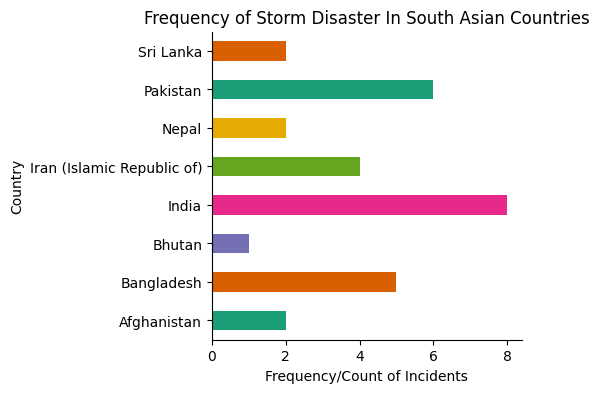

In [28]:
# Frequency of Storm Disasters in South Asian Countries

plt.figure(figsize = (4,4))
result2_df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frequency/Count of Incidents')
plt.title('Frequency of Storm Disaster In South Asian Countries')

Text(0.5, 1.0, 'Frequency of Earthquake Disaster In South Asian Countries')

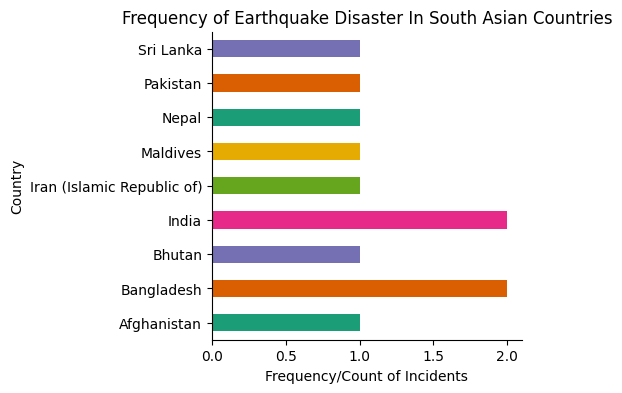

In [29]:
# Frequency of Earthquake Disasters in South Asian Countries

plt.figure(figsize = (4,4))
result3_df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frequency/Count of Incidents')
plt.title('Frequency of Earthquake Disaster In South Asian Countries')

Text(0.5, 1.0, 'Frequency of Drought Disaster In South Asian Countries')

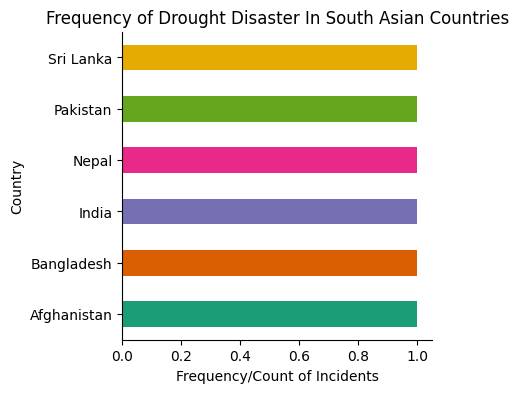

In [30]:
# Frequency of Drought Disasters in South Asian Countries

plt.figure(figsize = (4,4))
result4_df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frequency/Count of Incidents')
plt.title('Frequency of Drought Disaster In South Asian Countries')

---
### Data Creation for India Country

* Store the result in a data frame called disaster_india
* Select the columns 'Country', 'ISO', 'Location', 'Disaster Type', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected' and 'Year'
---

In [34]:
# Filter the fourdisaster_df data by using 'Country' name India

filter_india = fourdisaster_df[fourdisaster_df['Country'] == 'India']

# Select specific Columns from the filter_india object and store them in disaster_india
# Convert them in a data frame format

disaster_india = filter_india[['Country','ISO', 'Disaster Type', 'Location', 'Total Deaths',
                               'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', 'Year']]

# Check the shape of the disaster_india data frame

print('Number of Rows in disaster_india:', disaster_india.shape[0])
print('Number of Columns in disaster_india:', disaster_india.shape[1])

# Check first five rows of the data frame disaster_india

disaster_india.head()

Number of Rows in disaster_india: 276
Number of Columns in disaster_india: 10


,Country,ISO,Disaster Type,Location,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Year
6,India,IND,Storm,Andhra Pradesh province,NaN,NaN,NaN,NaN,NaN,2000
9,India,IND,Storm,"Nagappattinam, Thanjavur, Sirkali, Papanasam, ...",NaN,NaN,30000.0,NaN,30000.0,2000
15,India,IND,Storm,Uttar Pradesh province,21.0,NaN,NaN,NaN,NaN,2001
17,India,IND,Storm,Andhra Pradesh province,78.0,NaN,25000.0,2000.0,27000.0,2001
18,India,IND,Storm,"Gujarat, Goa, Maharashtra, Kerala provinces",NaN,NaN,NaN,NaN,NaN,2001


In [35]:
# Exporting th disaster_data data frame in csv file
# Name the file as 'India_Disaster.csv'

file_path = '/content/drive/MyDrive/Project_Data_Sets/India_Disaster.csv'
disaster_india.to_csv(file_path, index = False)